In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
# Load the Mushroom Dataset
df = pd.read_csv('mushrooms.csv')

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [5]:
df.tail()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[5 rows x 23 columns]

In [6]:
# Check for empty values
empty_values = df.isin(['?', np.nan]).sum()
print(empty_values)
# Replace empty values with the mean of their respective columns
for column in empty_values.index:
    if empty_values[column] > 0:
        column_mean = pd.to_numeric(df[column], errors='coerce').mean()
        df[column].replace(['?', np.nan], column_mean, inplace=True)


class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

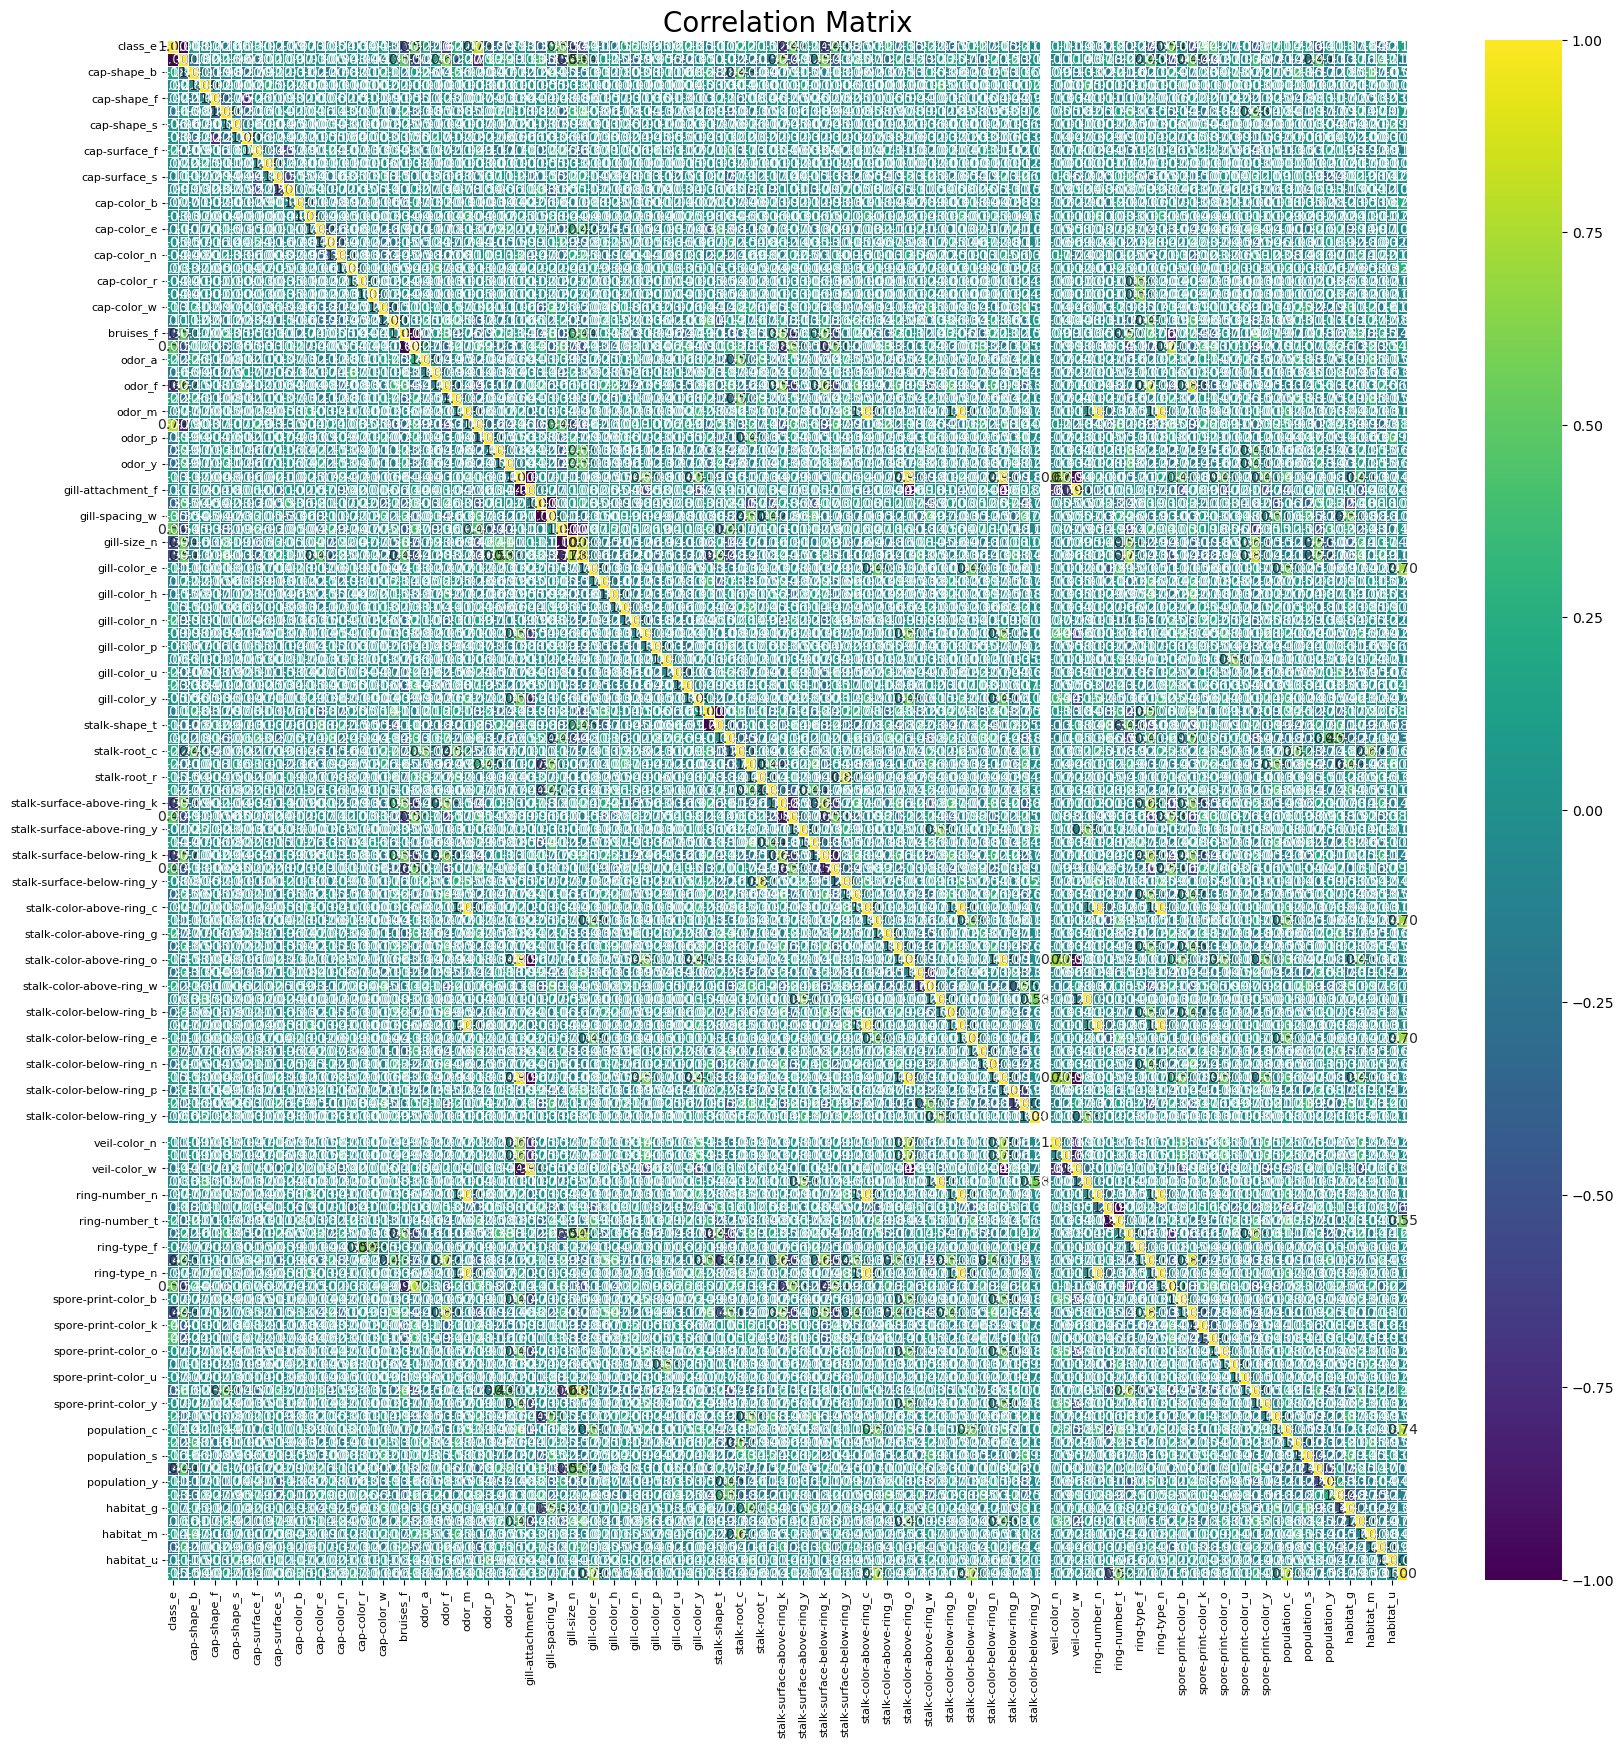

In [9]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Generate the correlation matrix figure with increased clarity and better features
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [10]:
# Data Preprocessing
# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
   df[col] = le.fit_transform(df[col])

In [11]:
# Feature Selection and Extraction
# Select the top 10 features using chi-squared test
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']
top_features = feature_scores.nlargest(10, 'Score')['Feature'].tolist()
X = df[top_features]

In [12]:
# Classification
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generalized Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

# Bayesian and Statistical Methods
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


In [13]:
# Compare the performance of the models
models = ['Generalized Logistic Regression', 'Linear Discriminant Analysis', 'Bayesian and Statistical Methods']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, lda_pred), accuracy_score(y_test, nb_pred)]
precision = [precision_score(y_test, lr_pred), precision_score(y_test, lda_pred), precision_score(y_test, nb_pred)]
recall = [recall_score(y_test, lr_pred), recall_score(y_test, lda_pred), recall_score(y_test, nb_pred)]
f1 = [f1_score(y_test, lr_pred), f1_score(y_test, lda_pred), f1_score(y_test, nb_pred)]
roc_auc = [roc_auc_score(y_test, lr_pred), roc_auc_score(y_test, lda_pred), roc_auc_score(y_test, nb_pred)]

In [14]:
# Create a table to compare the performance metrics
performance_metrics = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC Score': roc_auc})
print(performance_metrics)

                              Model  Accuracy  Precision    Recall  F1 Score  \
0   Generalized Logistic Regression  0.949959   0.957649  0.938188  0.947819   
1      Linear Discriminant Analysis  0.936423   0.945312  0.922100  0.933562   
2  Bayesian and Statistical Methods  0.913043   0.937669  0.878916  0.907343   

   ROC-AUC Score  
0       0.949603  
1       0.935990  
2       0.912012  


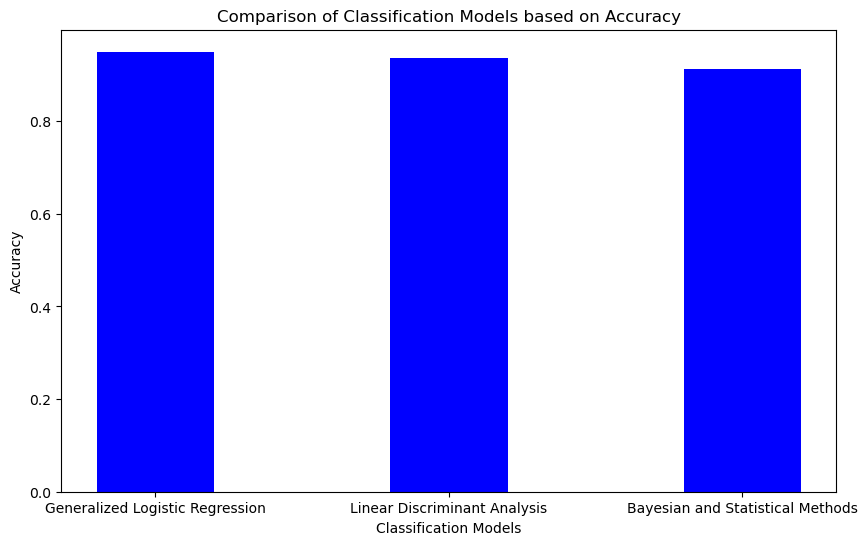

In [15]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='b', width=0.4)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models based on Accuracy')
plt.show()

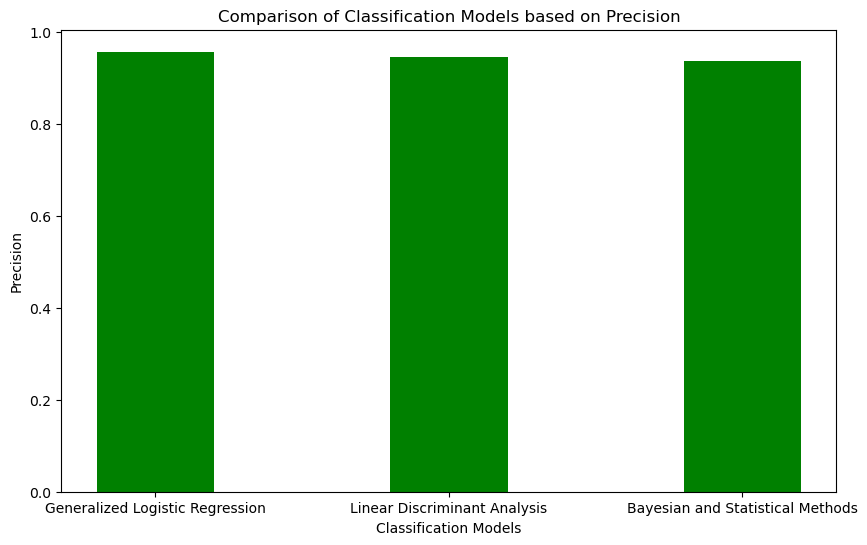

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(models, precision, color='g', width=0.4)
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.title('Comparison of Classification Models based on Precision')
plt.show()

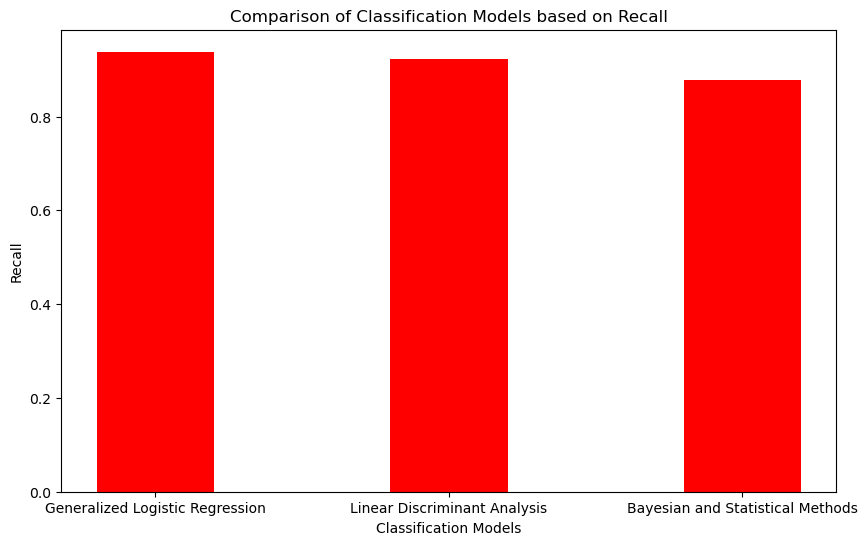

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color='r', width=0.4)
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.title('Comparison of Classification Models based on Recall')
plt.show()

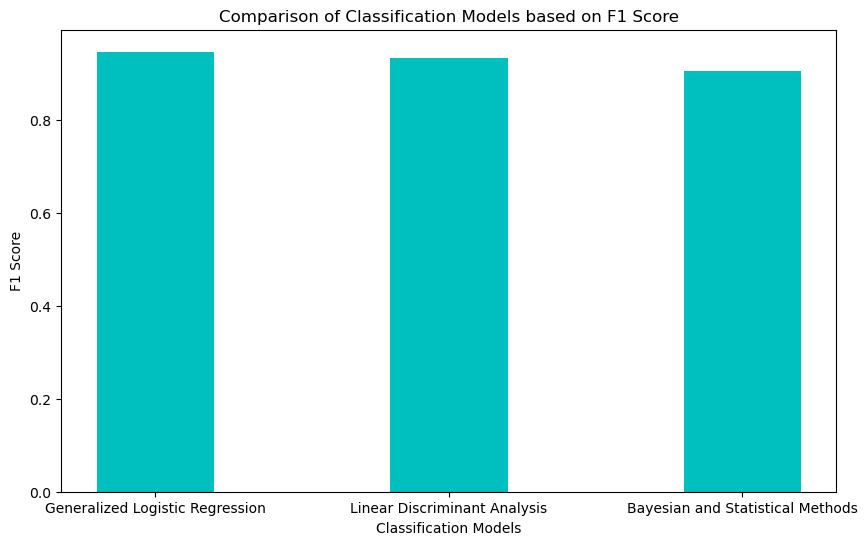

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(models, f1, color='c', width=0.4)
plt.xlabel('Classification Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Classification Models based on F1 Score')
plt.show()


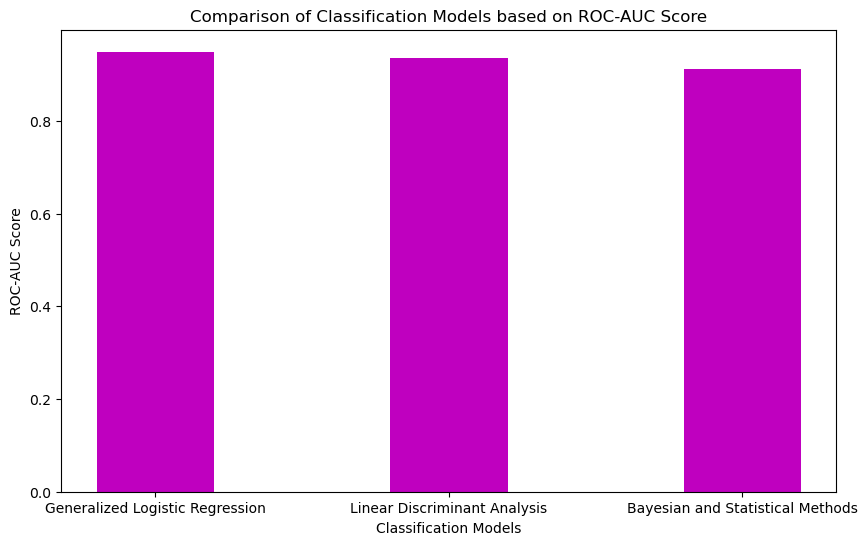

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(models, roc_auc, color='m', width=0.4)
plt.xlabel('Classification Models')
plt.ylabel('ROC-AUC Score')
plt.title('Comparison of Classification Models based on ROC-AUC Score')
plt.show()